<h1>Новые признаки<h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
uni_gen_dict = {}  # этот словарь для моего первого нового признака: Game_genre_rate
num_gen = {}

ПРИЗНАКИ:

1) Я добавила рейтинг жанра игры - "Game_genre_rate". Я вычислила отношение оценки игры к средней оценке для ее жанра.
Таким образом я хотела понять, насколько хорошо игра оценивается по сравнению с другими играми того же жанра.
Коэффициент меньше 1 - значит игра хуже среднего, больше 1 - лучше среднего.

2) Я добавила относительную популярность жанра на платформе. Я вычислила долю игр каждого жанра на каждой платформе.
Это даст представление о том, какие жанры наиболее популярны на разных платформах и как эти предпочтения различаются.
Что значат циферки в этом признаке? Если, например, значение этого столбца 0.25, значит игры
этого жанра составляют 25% всего контента на платформе.

3) Я добавила относительную оценку жанра на платформе. Я вычислила среднюю оценку жанра на каждой платформе,
а затем разделю ее на среднюю оценку по всем жанрам на этой платформе, чтобы посмотреть, какие жанры получают
относительно высокие или низкие оценки на разных платформах.
Что значат циферки тут? Если оценка Жанра Экшн на платформе ПК равно 6, значит в среднем на пк игры в этом жанре
оценивают на 6 При этом эта же игра, в этом же жанре но на платформе Айфон может быть оценена на 10.
Я хочу использовать этот признак, чтобы определить, на какую лучше платформу выпускать игру того или иного жанра.

Первый новый признак
____________________________________________________________________________________________________________
Первым делом соберу все данные о всех оценках во всех жанрах.

In [27]:
with open("../All_data_files/total_data_set.csv", "r", encoding='utf-8') as ign:
    text = pd.read_csv(ign)
    # print(text['genre'], text['score'])
    # тут для посчитаем количество игр каждого жанра
    n = 0
    for i_gen in text['genre']:
        try:
            if i_gen not in num_gen:
                num_gen[i_gen] = 0
            num_gen[i_gen] += 1
        except (KeyError, ValueError, TypeError):
            continue
        n += 1

    n = 0
    # Тут для каждого жанра посчитаем общий счет
    for i_gen in text['genre']:
        try:
            if i_gen not in uni_gen_dict:
                uni_gen_dict[i_gen] = 0
            uni_gen_dict[i_gen] += float(text.iloc[[n]]['score'])
        except (KeyError, ValueError, TypeError):
            continue
        n += 1

    # Наконец найдем среднее
    mean_rate_dict = {}
    for i in num_gen.keys():
        mean_rate_dict[i] = uni_gen_dict[i]/num_gen[i]

Отлично, у меня есть средняя оценка для каждого жанра игр
Теперь буду искать относительную для каждого жанра оценку.

In [28]:
with open("../All_data_files/total_data_set.csv", "r", encoding='utf-8') as ign:
    text = pd.read_csv(ign)
    n = 0
    coeff_list = []
    score_list = []
    name_list = []

    # Сделаю лист со всеми счетами каждой игры
    for i_score in text['score']:
        try:
            score_list.append(i_score)
        except:
            score_list.append("None")
#     # Сделаю список с названием жанра каждой игры
    for i_name in text['genre']:
        try:
            name_list.append(i_name)
        except:
            name_list.append("None")

    # Мои списки одинаковы по длине, так что теперь я спокойно могу их использовать и сопоставлять с финальной таблицей
    n = 0
    for i_name in name_list:
        try:
            total_genre_rate = mean_rate_dict[i_name]
            coeff = round(float(score_list[n])/float(total_genre_rate), 3)
        except:
            coeff = "Game_genre_rate"
        coeff_list.append(coeff)
        n += 1

    text["Game_genre_rate"] = coeff_list
    text.to_csv("total_data_set.csv", index=False, encoding='utf-8')

    # Итак, я добавила первый новый признак, который в дальнейшем хочу использовать для своих вычислений.
    # Осталось еще два.

Второй новый признак
____________________________________________________________________________________________________________

А вот и продолжение. Итак, второй признак, который я хочу добавить - это популярность жанра на платформе.
Я вычислю долю игр каждого жанра на каждой платформе.

In [5]:
platf_dict = {}  #{platform : {genre: number}}
coeff_dict = {} # {platform : {genre: proportion on platform}}

In [29]:
with open("../All_data_files/total_data_set.csv", "r", encoding='utf-8') as ign:
    text = pd.read_csv(ign)
    for platf in text['platform']:
        if platf not in platf_dict:
            platf_dict[platf] = {}
            coeff_dict[platf] = {} # понадобится дальше
    for key_platf in platf_dict.keys():
        for genre in text[text['platform'] == key_platf]['genre']:
            if genre not in platf_dict[key_platf]:
                coeff_dict[key_platf][genre] = 0
                platf_dict[key_platf][genre] = 0
            platf_dict[key_platf][genre] = platf_dict[key_platf].get(genre, 0) + 1

Что мы получили? Мы получили словарь, с каждой платформой. В каждом словаре еще словарь,
в котором написано количество игр каждого жанра на этой платформе.
Теперь я хочу рассчитать долю каждого жанра на каждой платформе.

In [30]:
for platf in platf_dict.keys():
   all_nums = sum(list(platf_dict[platf].values())) # Найдем всего жанров / игр на платформе
   for genre in platf_dict[platf]:
       genre_coeff = platf_dict[platf][genre] / all_nums # количество игр жанра делю на общее кол-во игр
       coeff_dict[platf][genre] = genre_coeff

Наконец добавим новый стобец

In [31]:
prop_list = []
with open("../All_data_files/total_data_set.csv", "r", encoding='utf-8') as ign:
    text = pd.read_csv(ign)
    for game in text.iloc:
        platf = game['platform']
        genre = game['genre']
        score = round(coeff_dict[platf][genre], 3)
        prop_list.append(score)

    text['Prop_of_genre_on_platf'] = prop_list
    text.to_csv("total_data_set.csv", index=False, encoding='utf-8')

Что я получила? Prop_list это список с пропорциями жанров на каждой платформе. Если, например, значение
этого столбца 0.25, значит игры этого жанра составляют 25% всего контента на платформе.

Третий новый признак
____________________________________________________________________________________________________________

Ура, остался последний признак. В качестве третьего признака
Я хочу добавить относительную оценку жанра на платформе.
Я вычислю среднюю оценку для каждого жанра на каждой платформе,
а затем разделю ее на среднюю оценку по всем жанрам на этой платформе, чтобы посмотреть, какие жанры
получают относительно высокие или низкие оценки на разных платформах.

названия тут похожи, это может путать, но назвать по-другому никак, потому что это буквально еще один словарь
с пратформами, но немножко другой...

In [9]:
platformdict = {}  #{platform : {genre: summ_score_rates}}

In [32]:
with open("../All_data_files/total_data_set.csv", "r", encoding='utf-8') as ign:
    text = pd.read_csv(ign)
    for platf in text['platform']:
        if platf not in platformdict:
            platformdict[platf] = {}
    for key_platf in platformdict.keys():
        for genre in text[text['platform'] == key_platf]['genre']:
            if genre not in platformdict[key_platf]:
                total_gen_sum = platf_dict[key_platf][genre]
                platformdict[key_platf][genre] = text[text['platform'] == key_platf][text['genre'] == genre]['score'].sum() / total_gen_sum

    # Итак, мы получили словарь, где для каждой платформы есть словарь с жанрами на ней, со средней оценкой этого жанра
    # на этой платформе
    # пример: {'PlayStation Vita': {'Action': 9.0, 'Platformer': 9.0}}. Это значит, что средняя оценка Экшнов
    # на Плэйстэйшне Вита - 9.
    # Теперь занесем это всё в total_data_set.csv
    mean_gen_score = []
    for game in text.iloc:
        platf = game['platform']
        genre = game['genre']
        score = round(platformdict[platf][genre], 3)
        mean_gen_score.append(score)
    text['Mean_score_per_genre'] = mean_gen_score
    text.to_csv("total_data_set.csv", index=False, encoding='utf-8')

[[<AxesSubplot:title={'center':'score'}>
  <AxesSubplot:title={'center':'release_year'}>]
 [<AxesSubplot:title={'center':'release_month'}>
  <AxesSubplot:title={'center':'Game_genre_rate'}>]
 [<AxesSubplot:title={'center':'Prop_of_genre_on_platf'}>
  <AxesSubplot:title={'center':'Mean_score_per_genre'}>]]


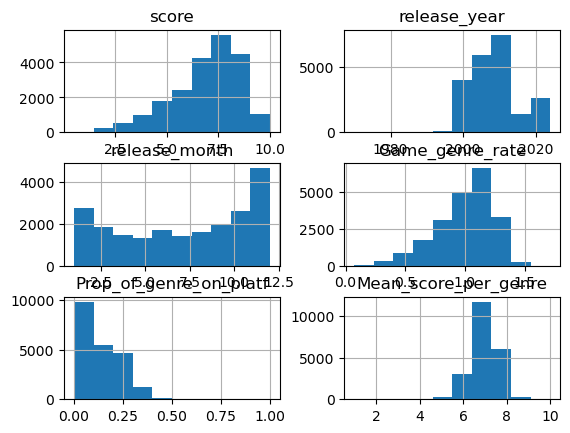

In [33]:
# Ура! Вот и все доп признаки, которые я хотела добавить.
# Давайте теперь посмотрим на них
df = pd.read_csv("total_data_set.csv")
print(df.hist())

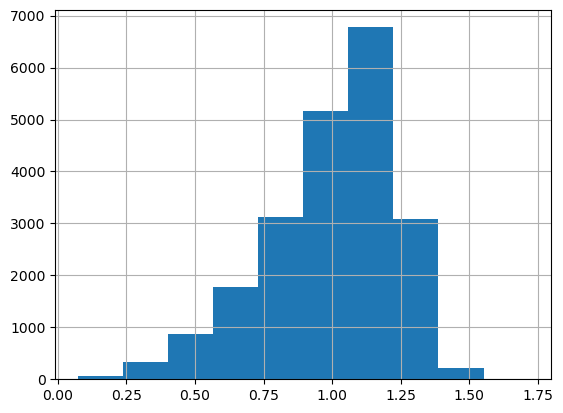

1.039


In [21]:
df['Game_genre_rate'].hist()
plt.show()
print(df['Game_genre_rate'].sort_values().median())
# Судя по графику и по медиане игры в большинестве случаев оцениваются выше среднего знаечния

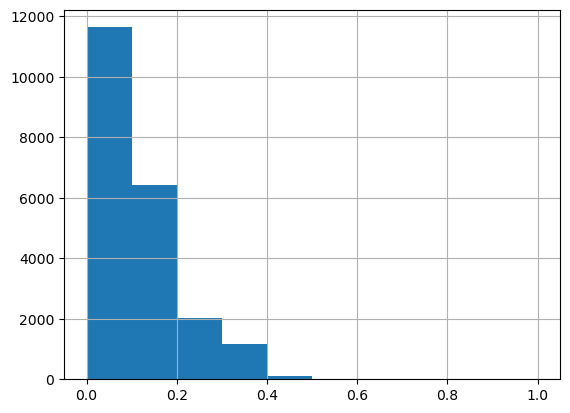

0.091


In [22]:
df['Prop_of_genre_on_platf'].hist()
plt.show()
print(df['Prop_of_genre_on_platf'].sort_values().median())
# Делаю вывод, что на платформах в среднем не более 10-20% игр одного жанра

In [34]:
with open("total_data_set.csv", 'r+', encoding='utf-8') as file:
    df = pd.read_csv(file, engine='python')
    single_genre_table = pd.DataFrame()
    safe_list = []
    for i in df['genre']:
        safe_list.append(i.split(",")[0])
    single_genre_table['single_genre'] = safe_list
    df['genre'] = single_genre_table['single_genre']
    df.to_csv('total_data_set.csv', index=False, encoding='utf-8')

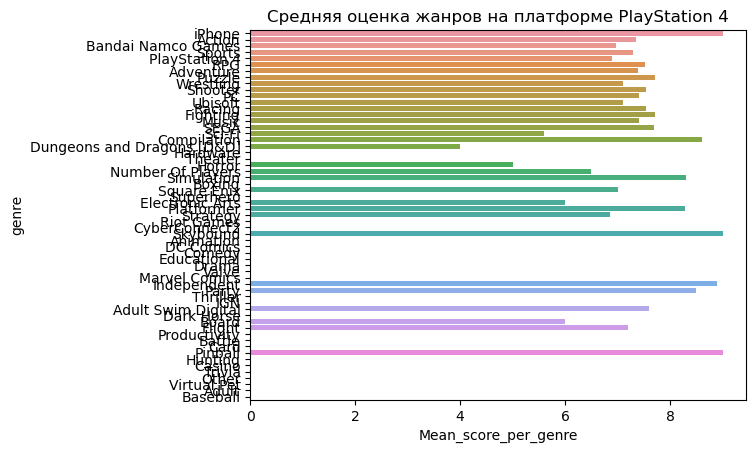

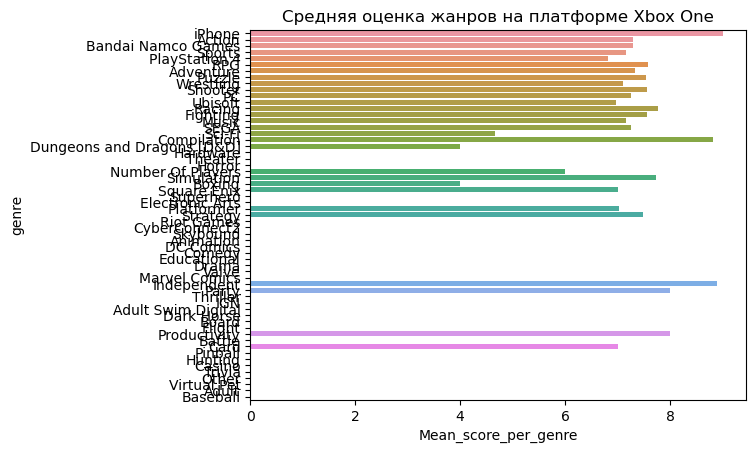

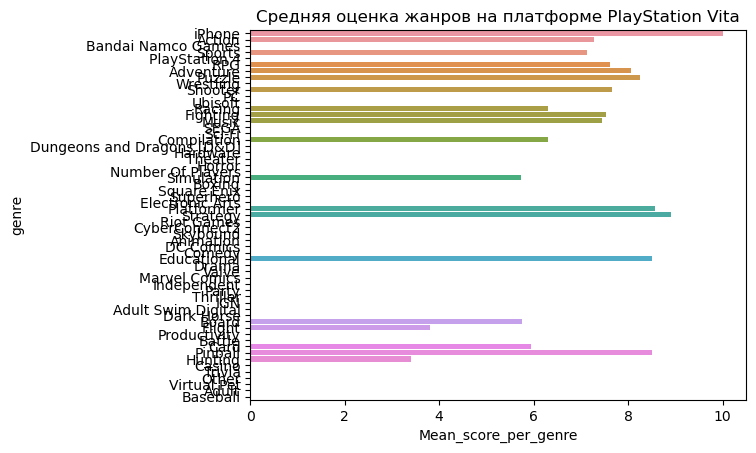

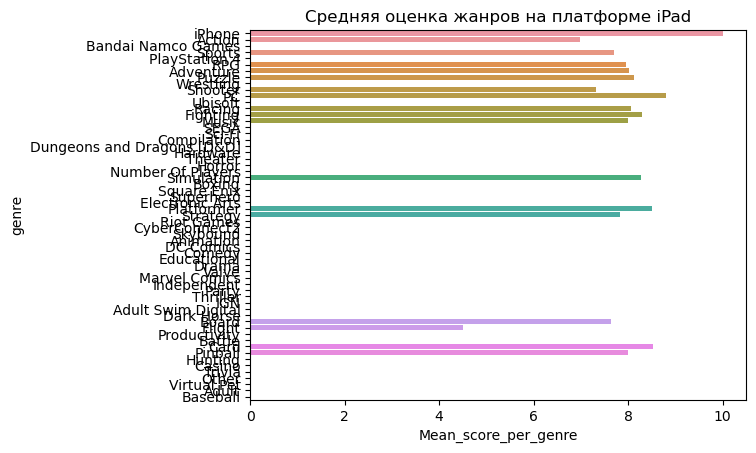

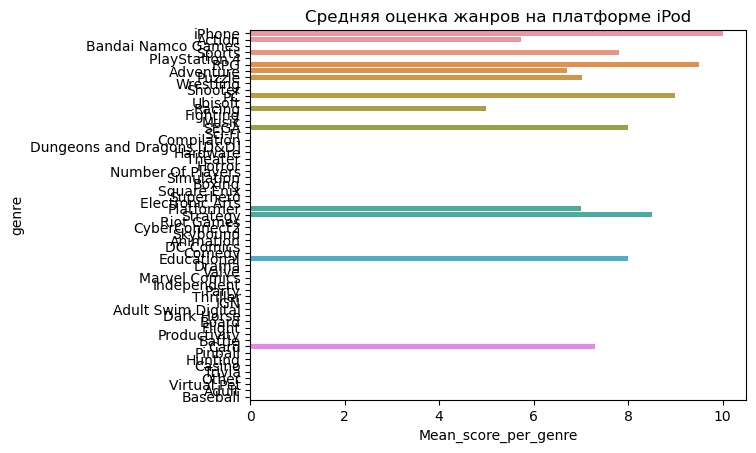

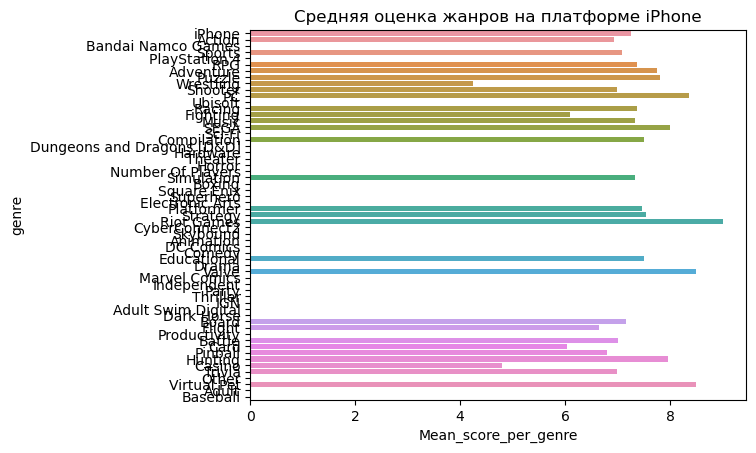

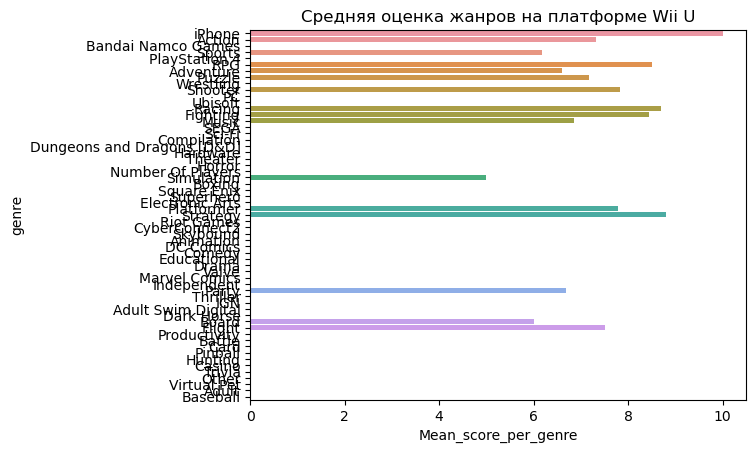

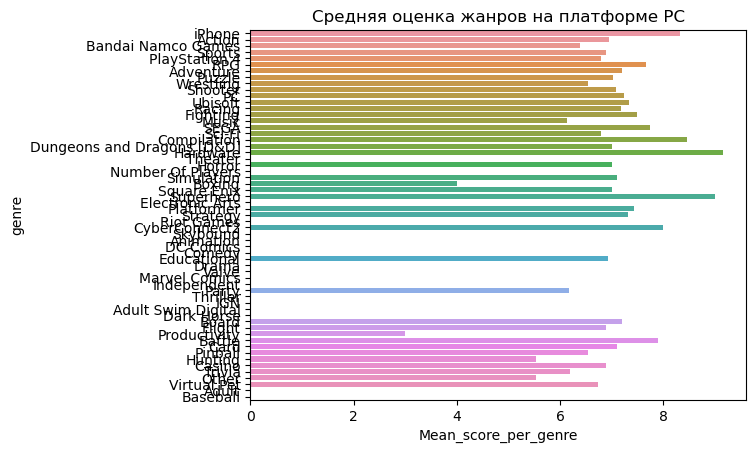

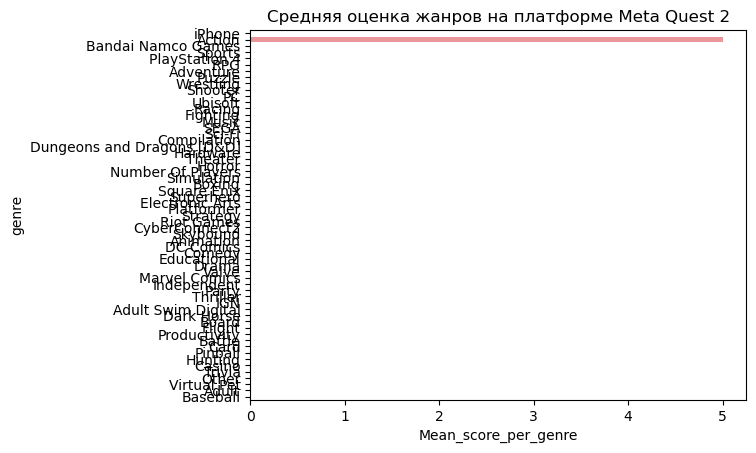

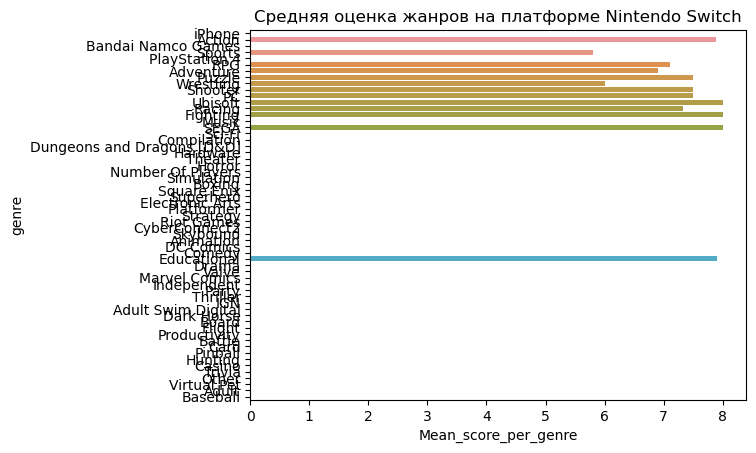

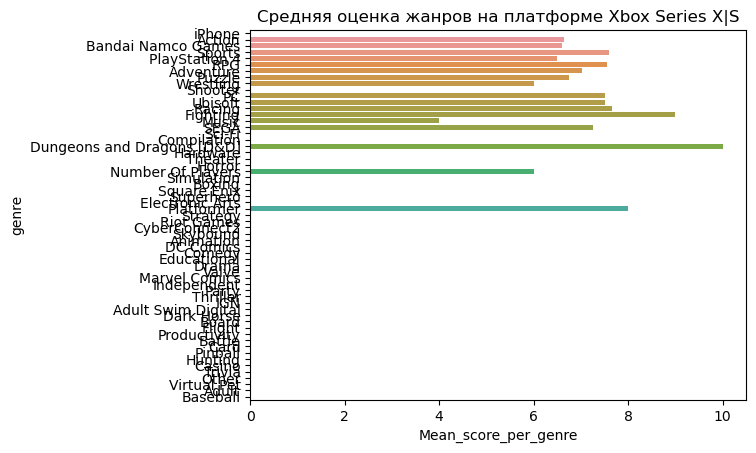

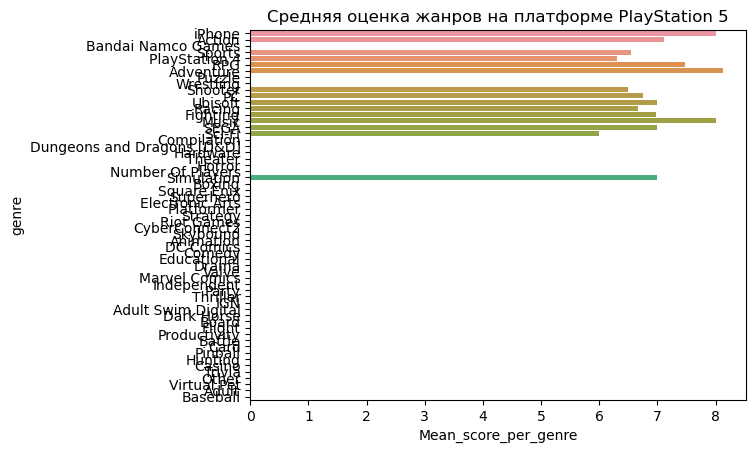

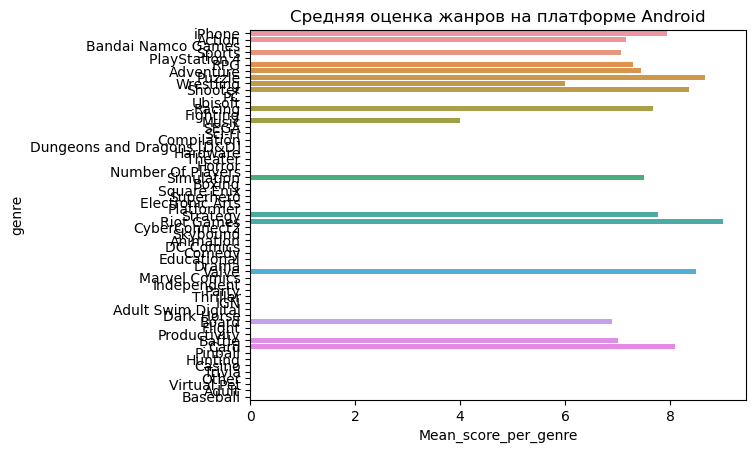

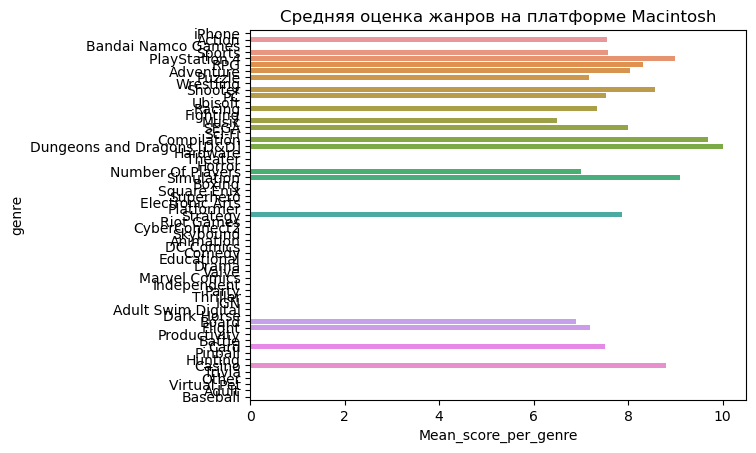

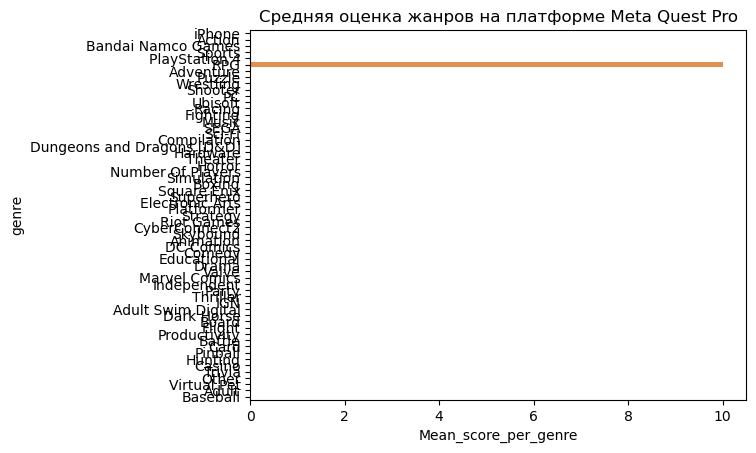

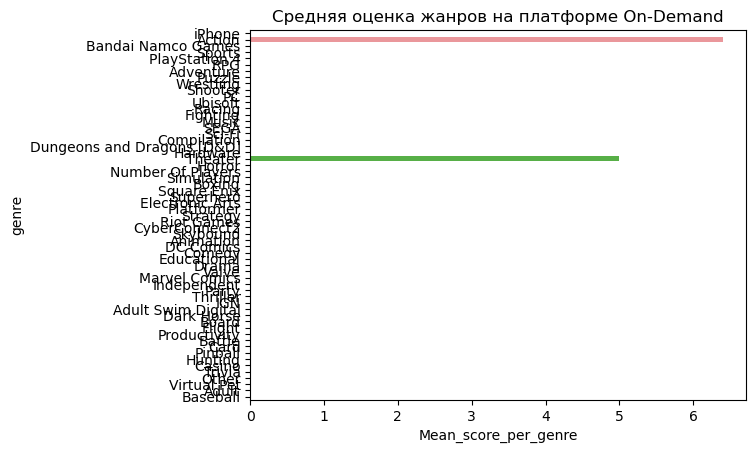

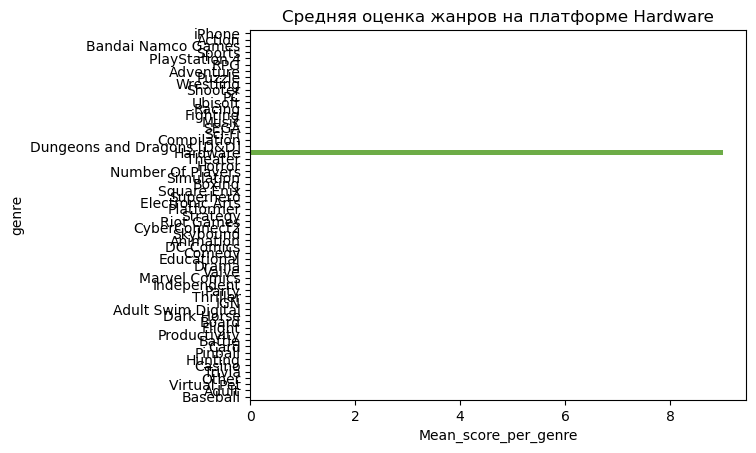

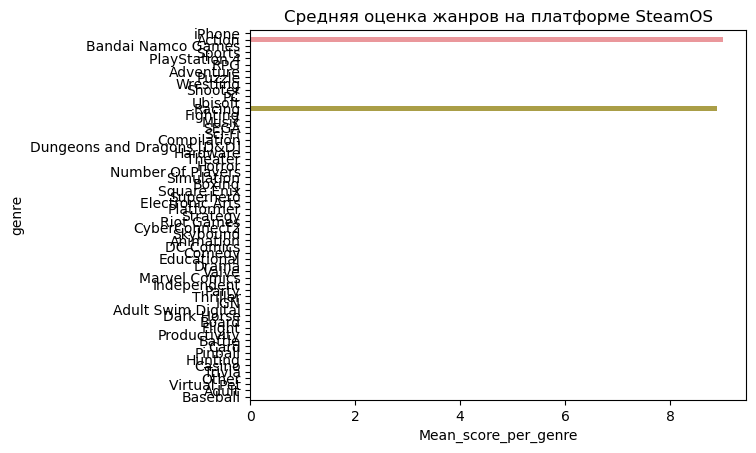

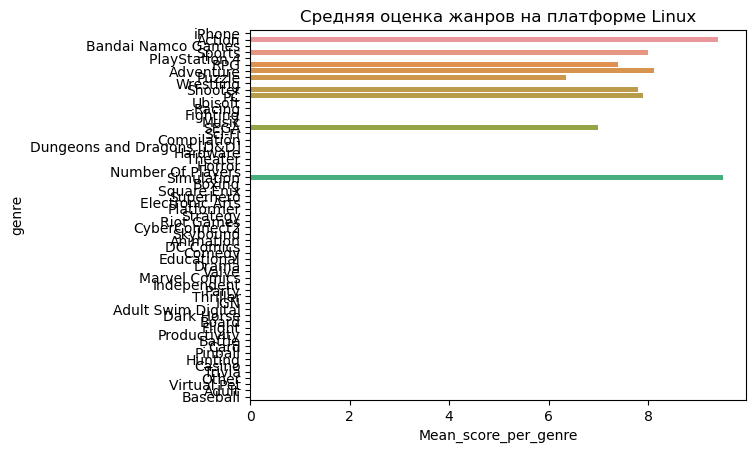

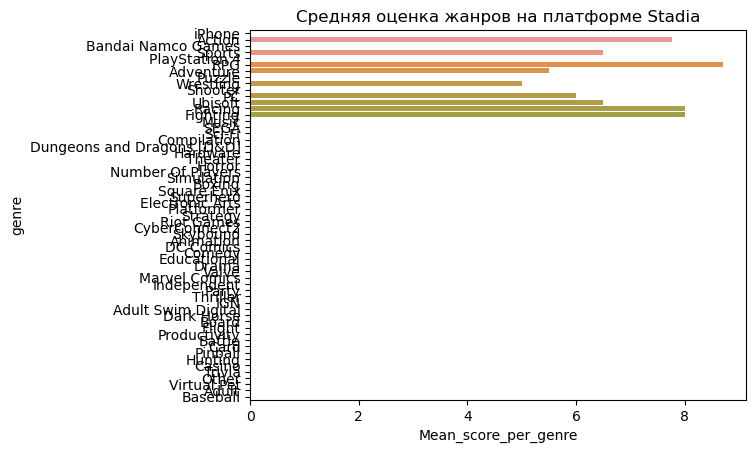

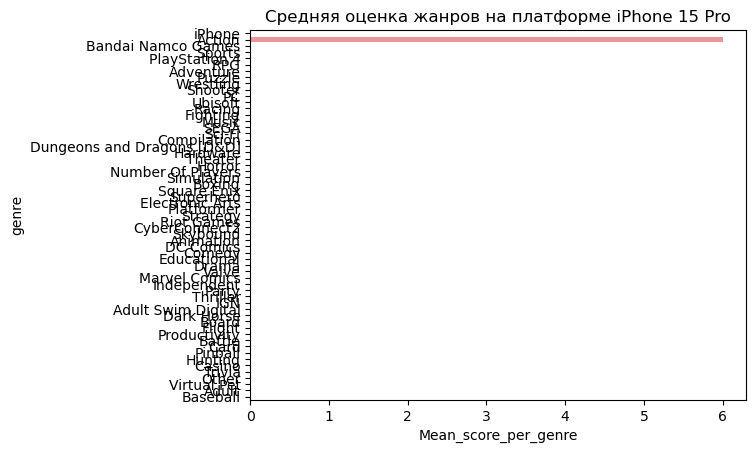

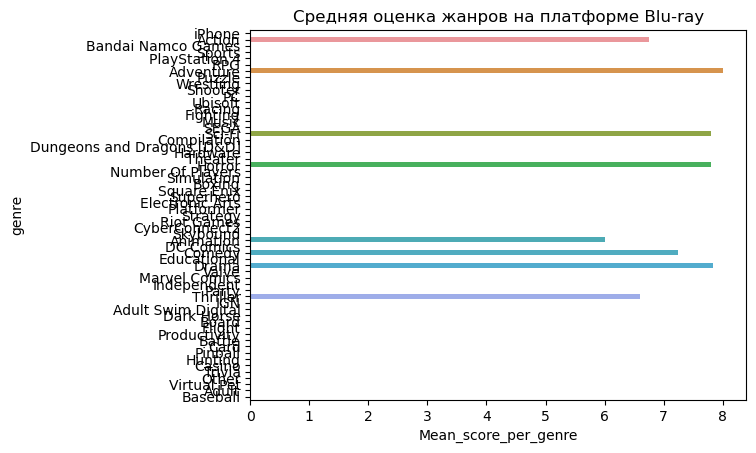

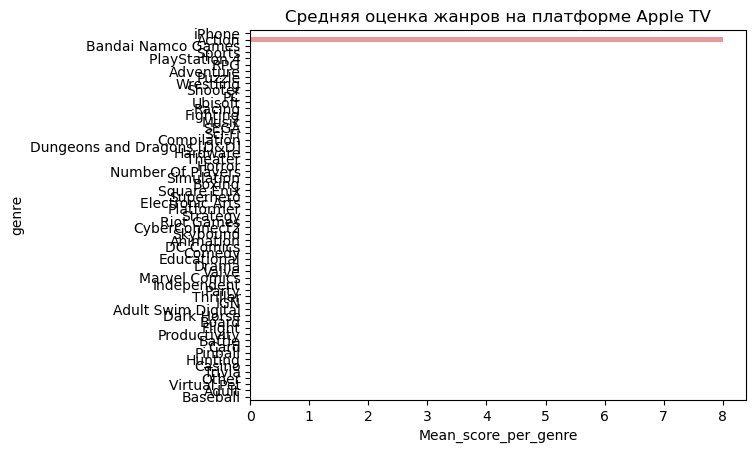

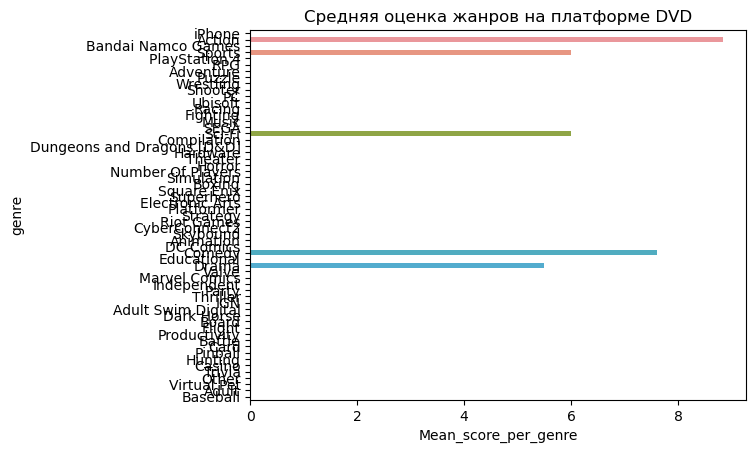

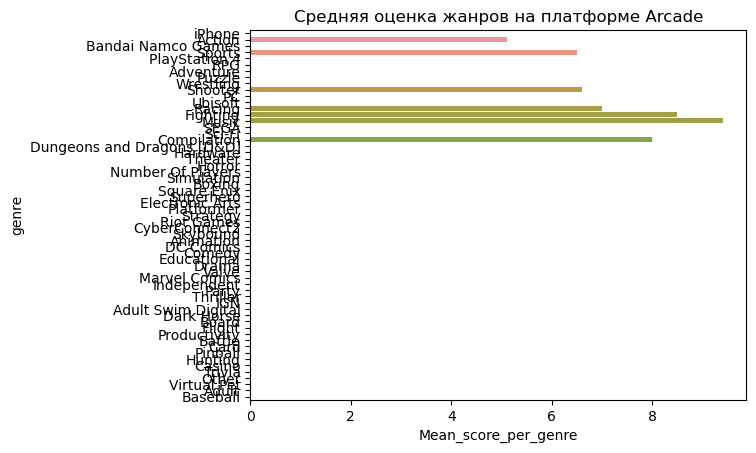

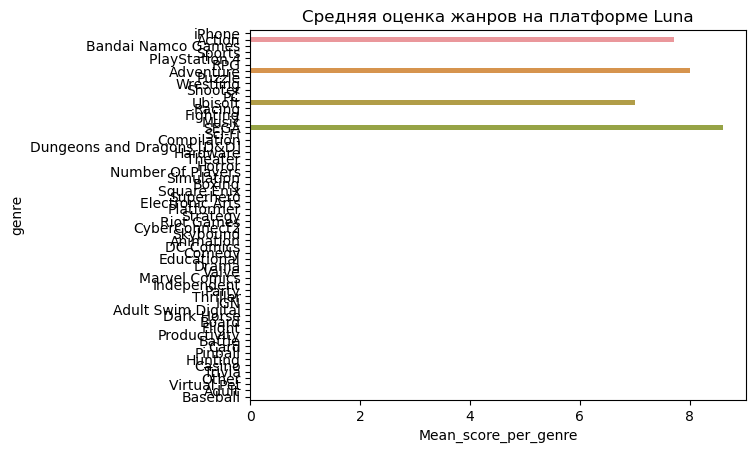

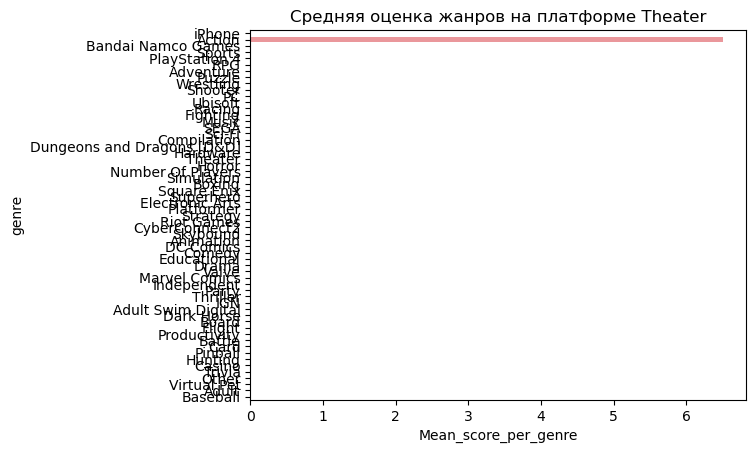

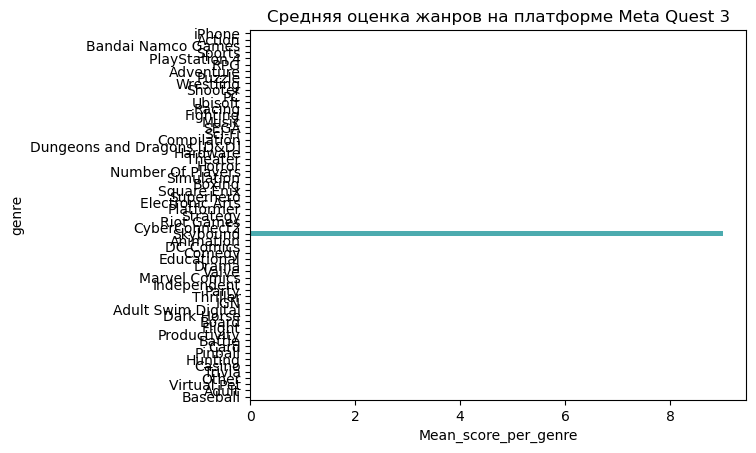

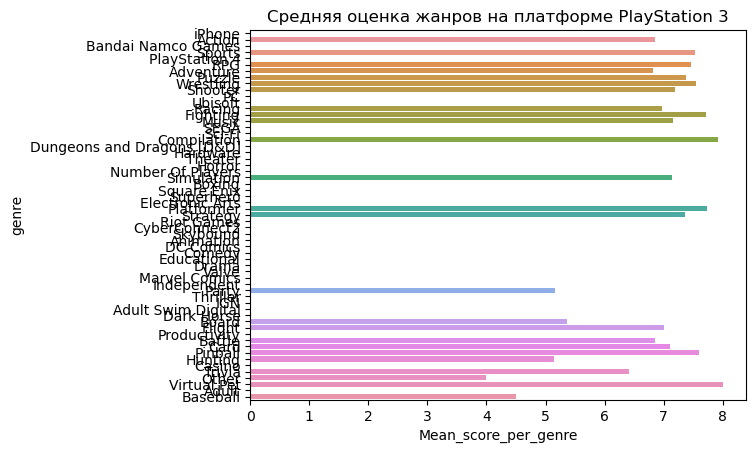

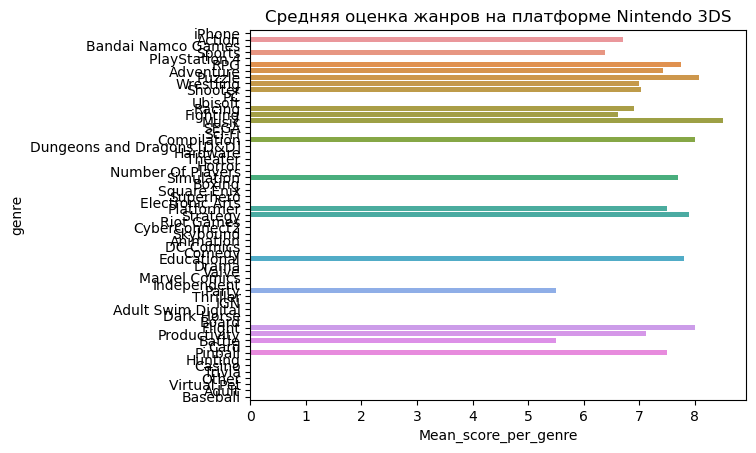

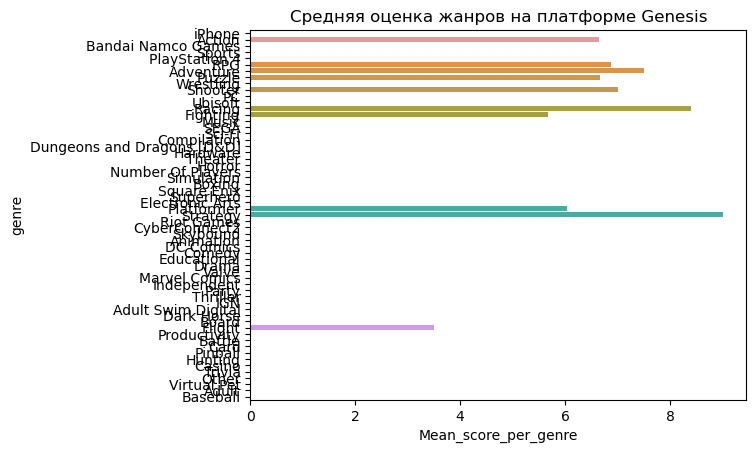

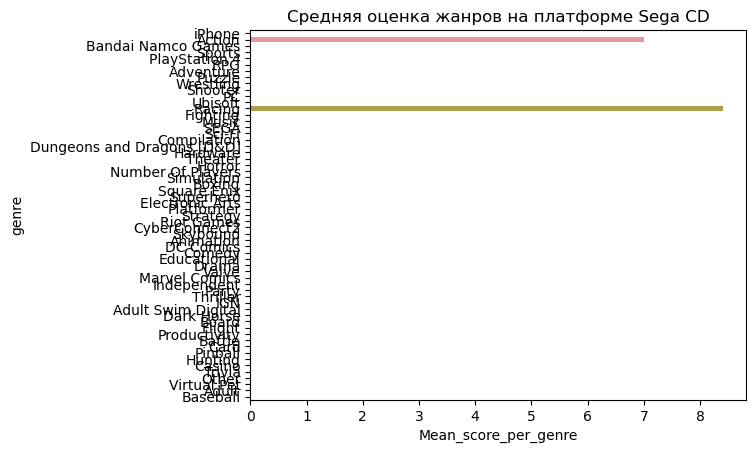

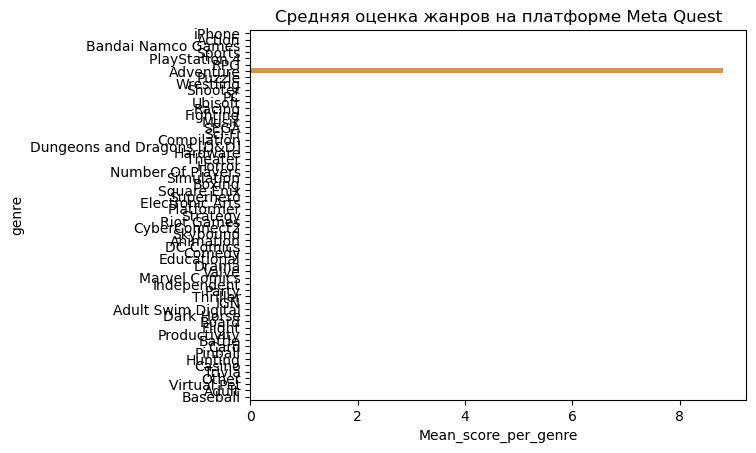

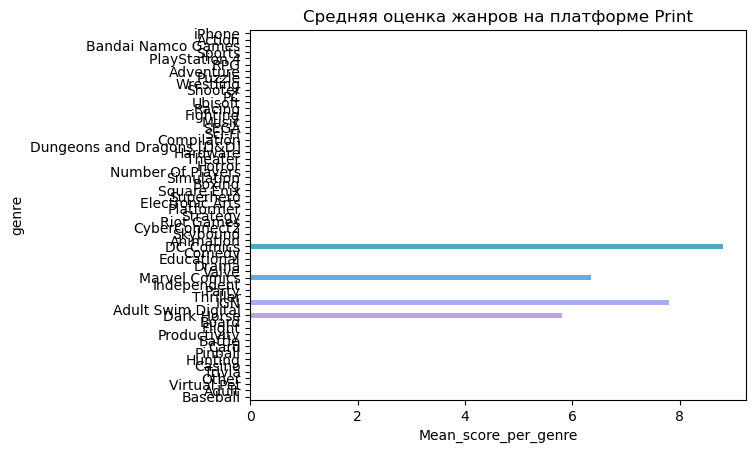

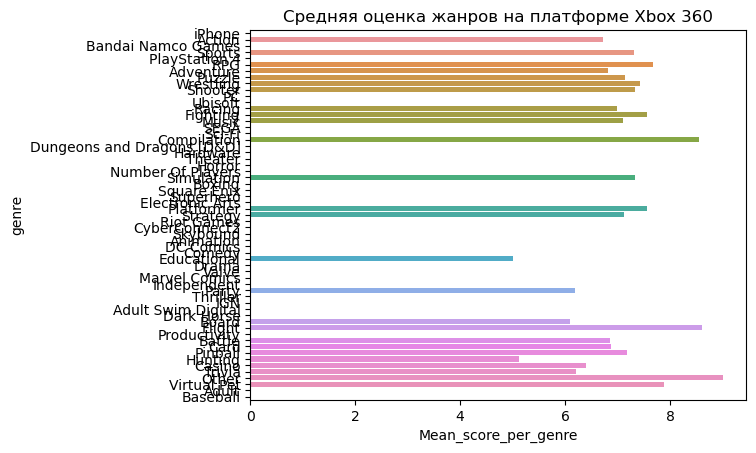

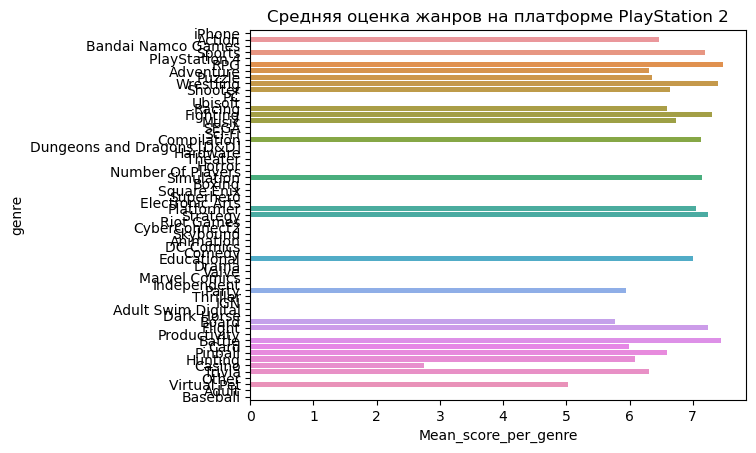

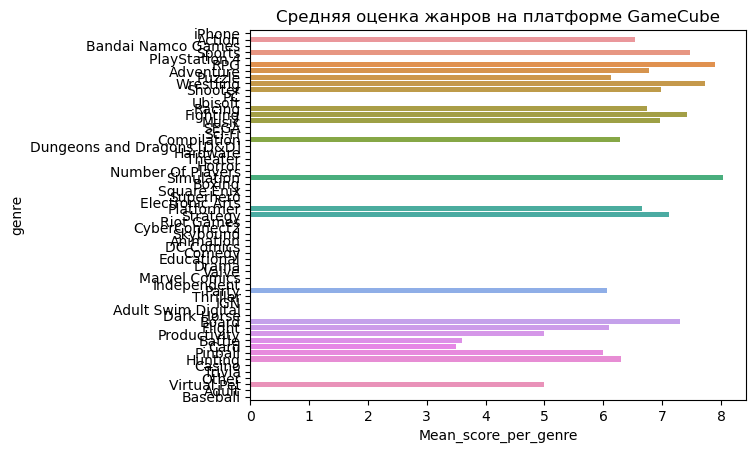

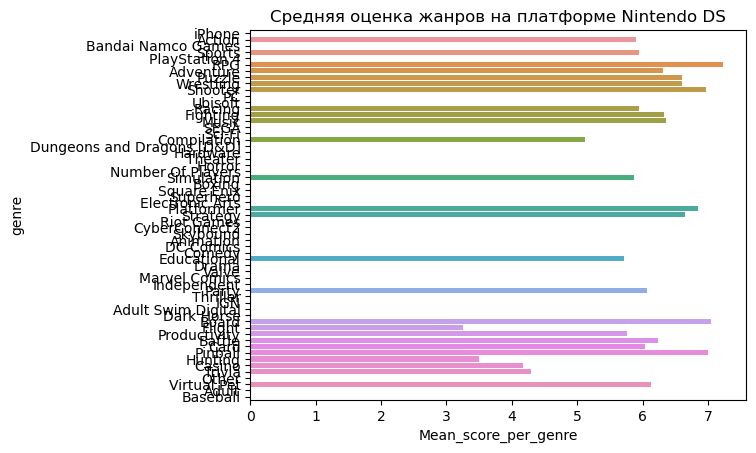

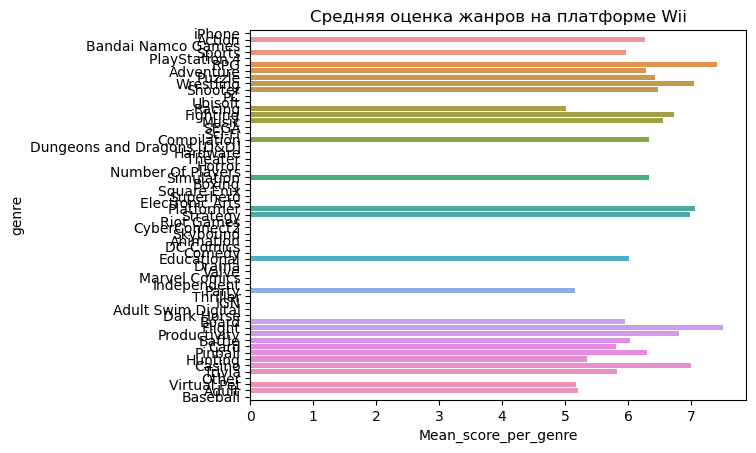

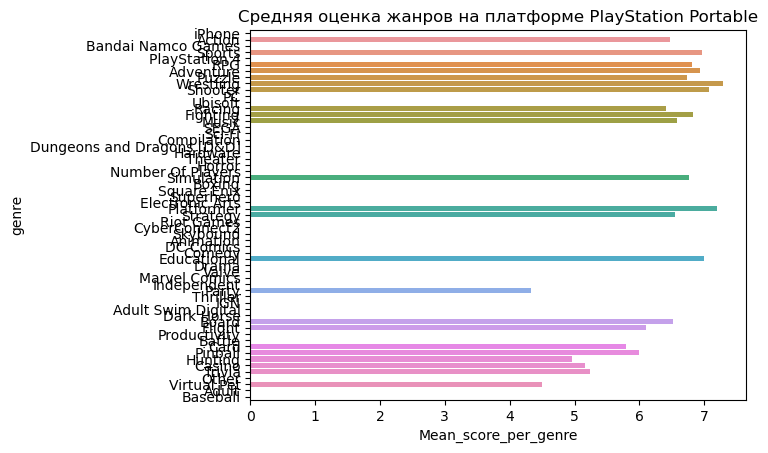

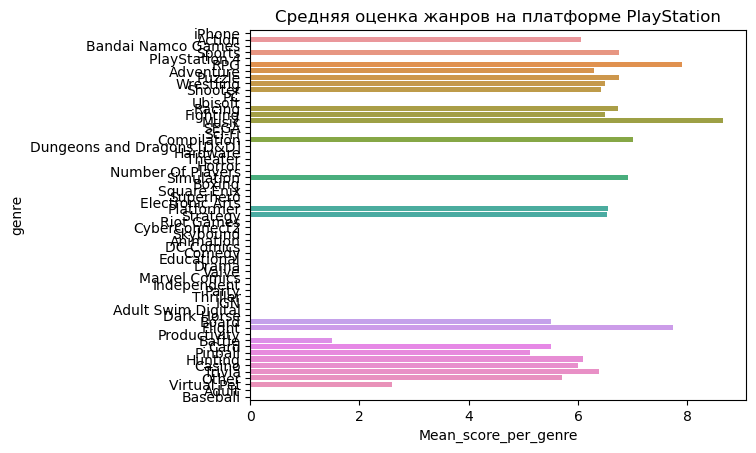

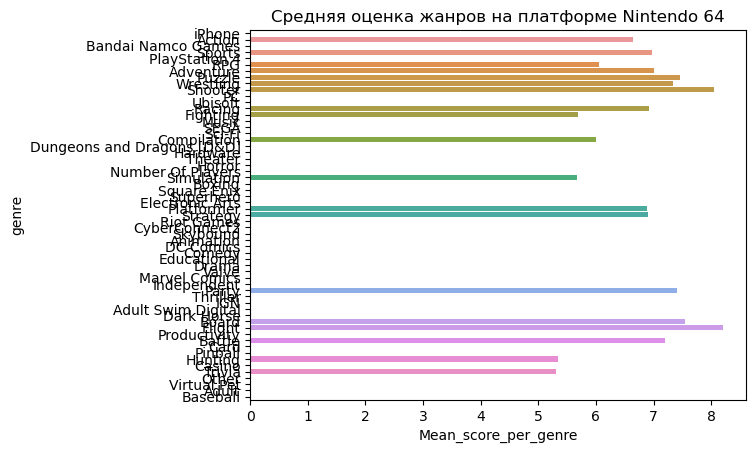

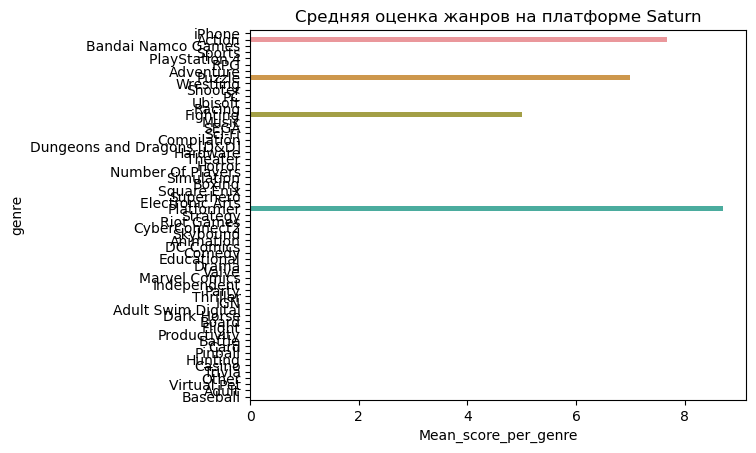

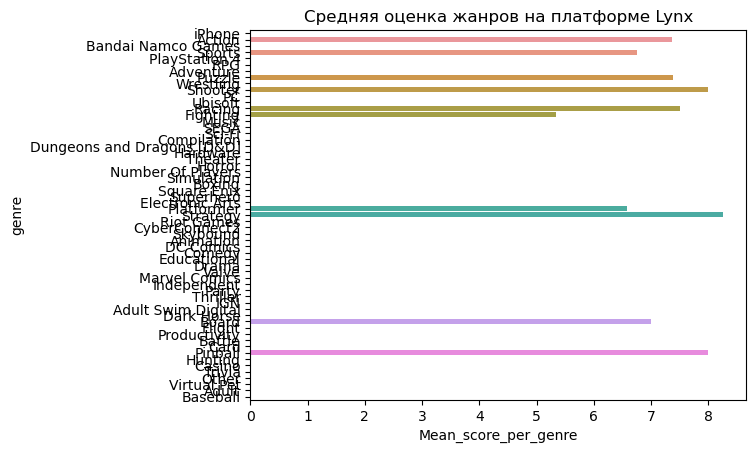

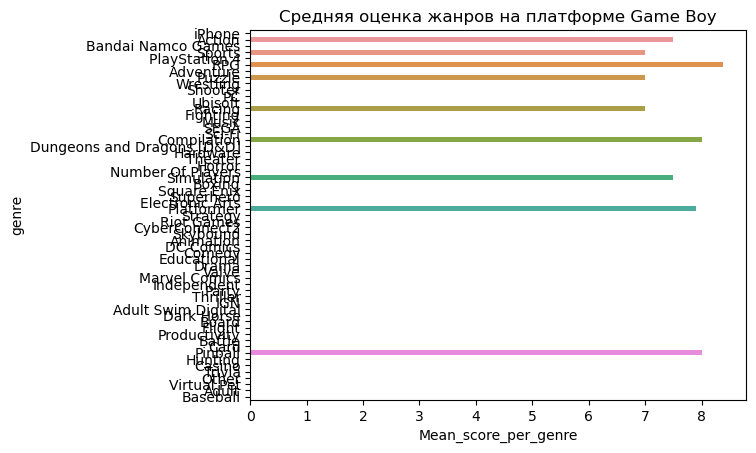

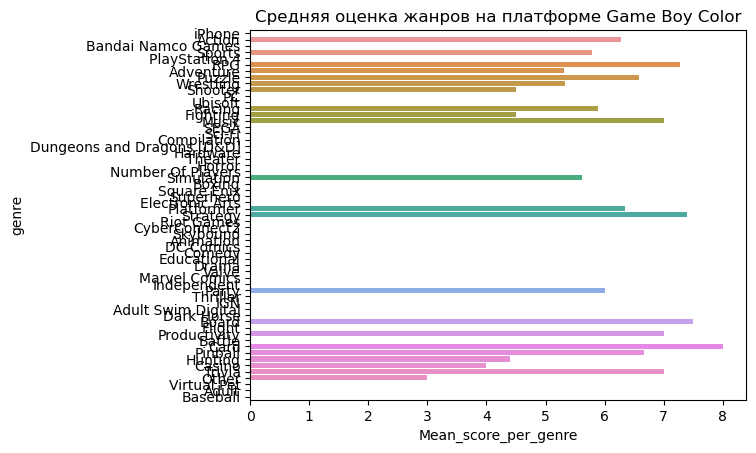

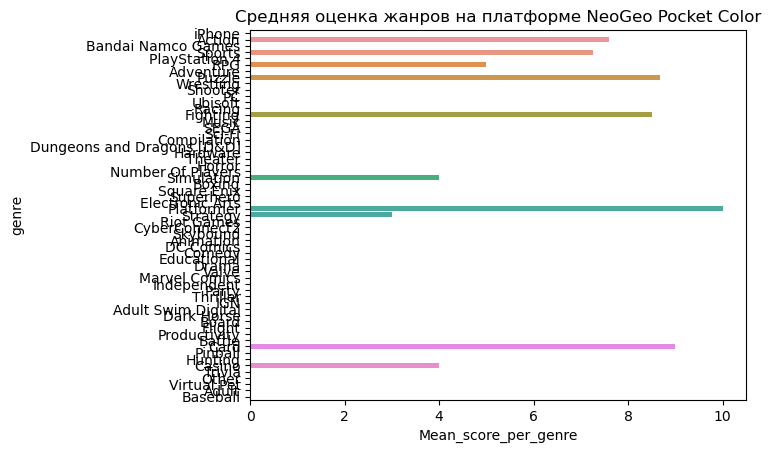

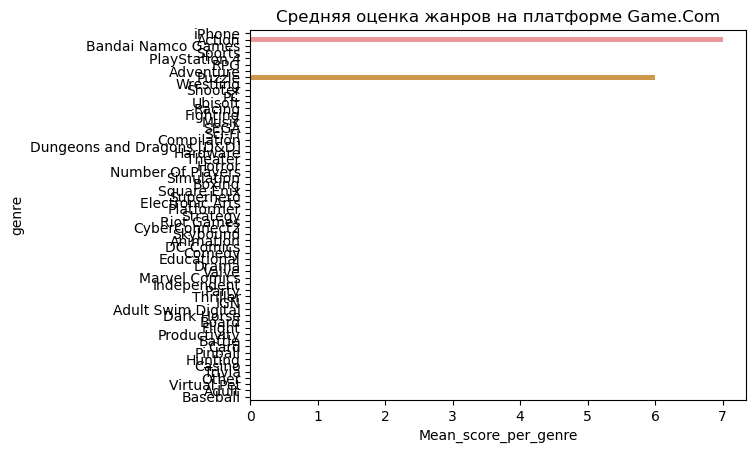

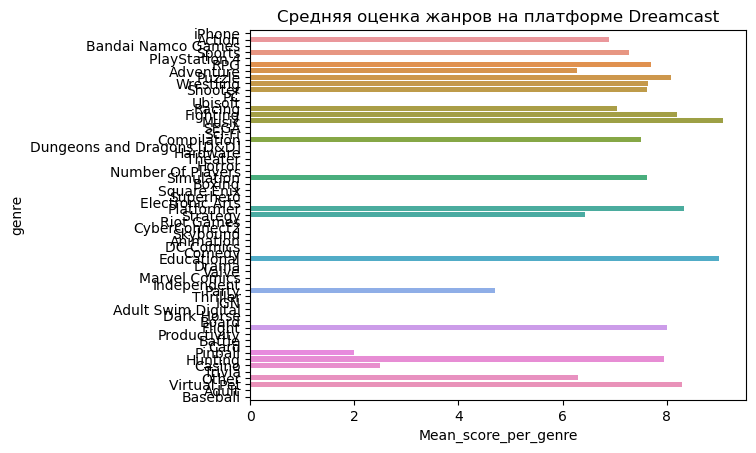

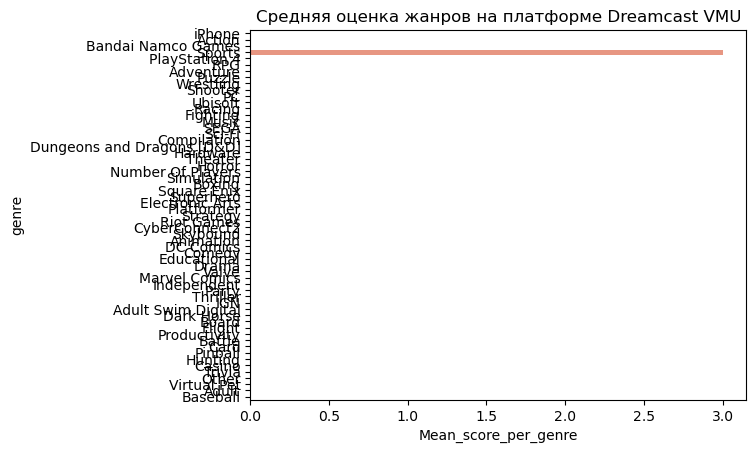

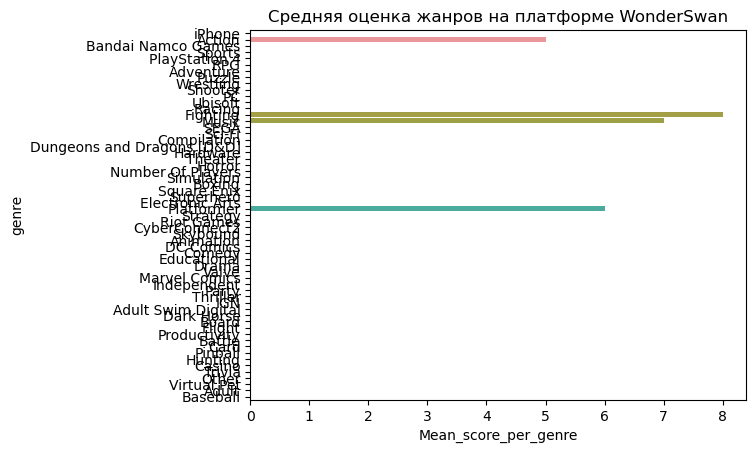

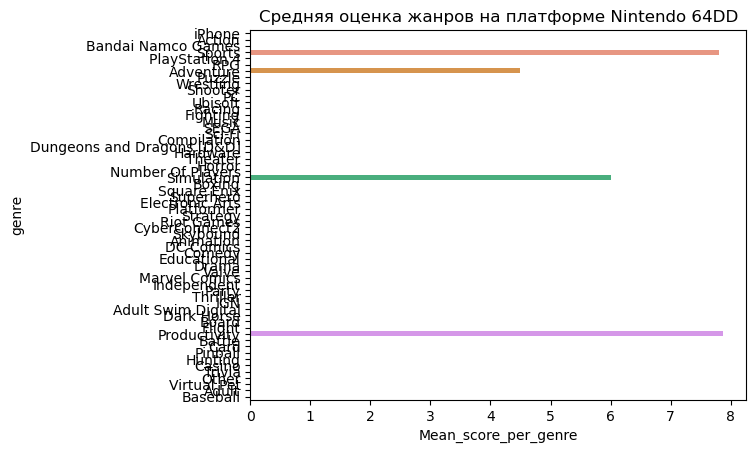

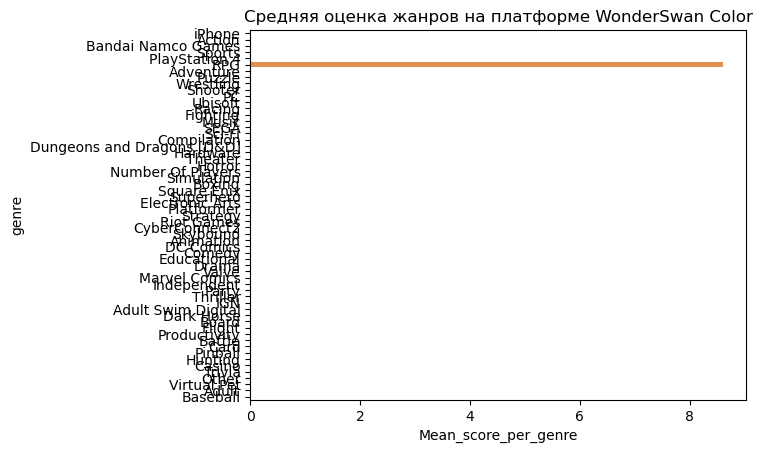

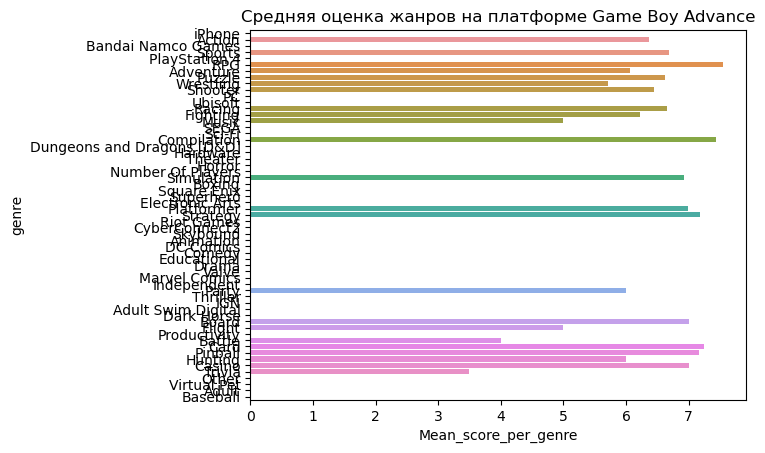

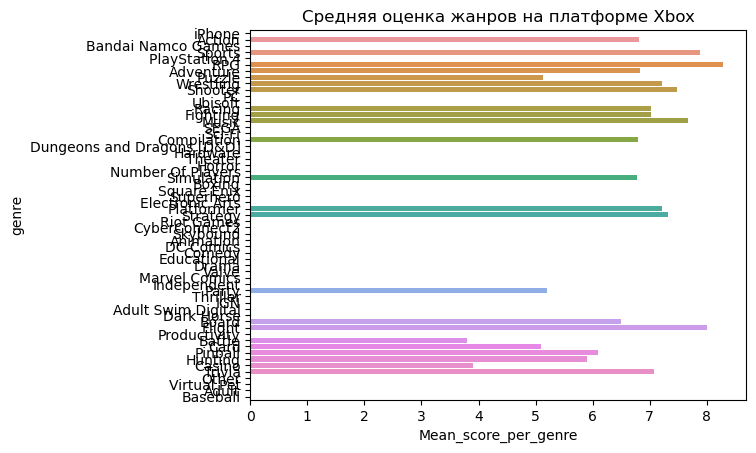

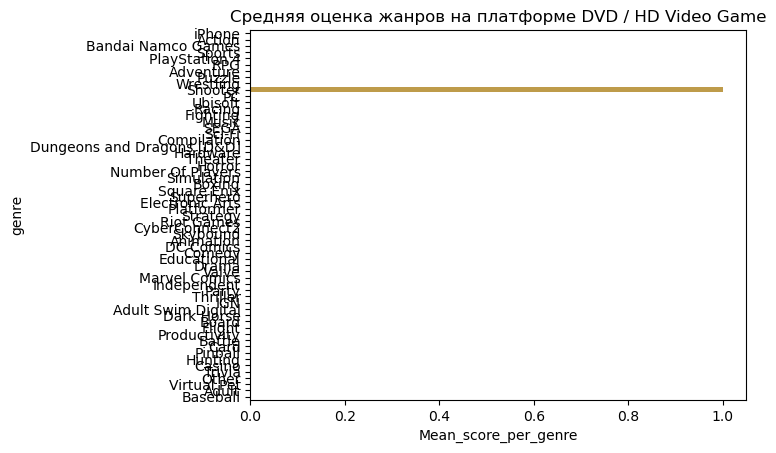

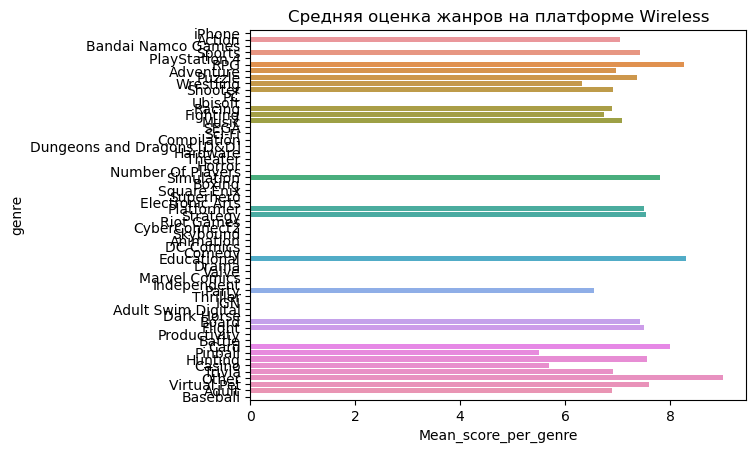

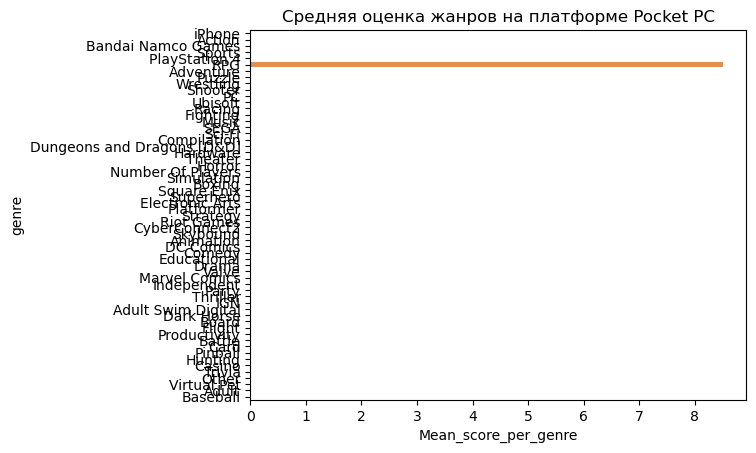

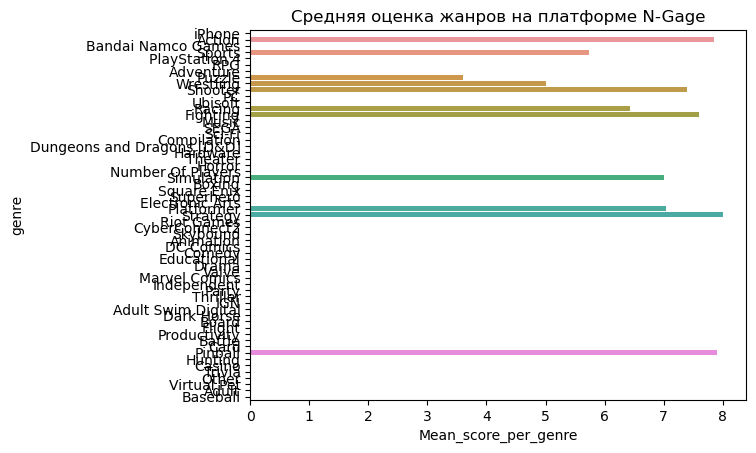

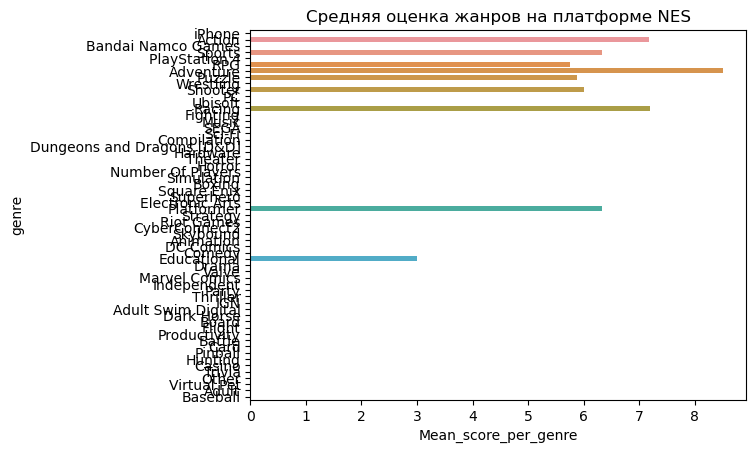

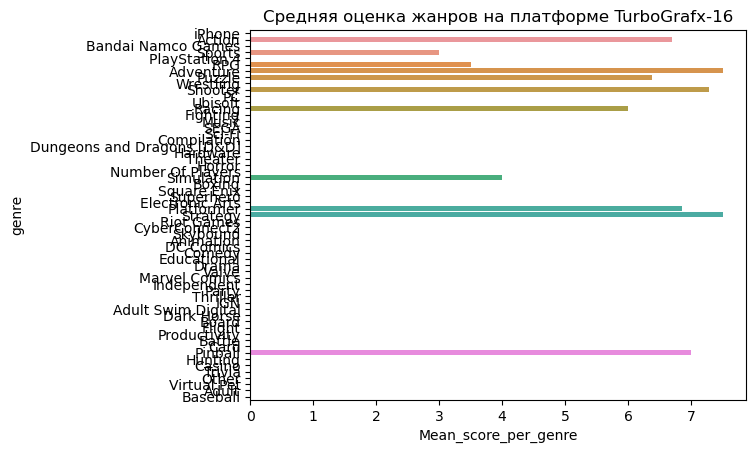

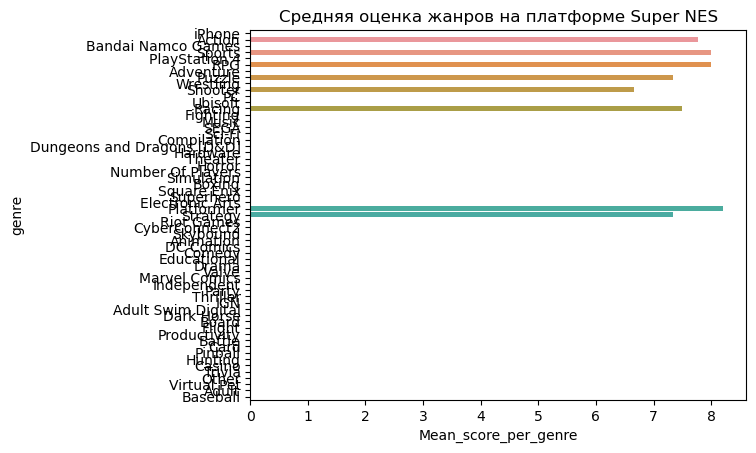

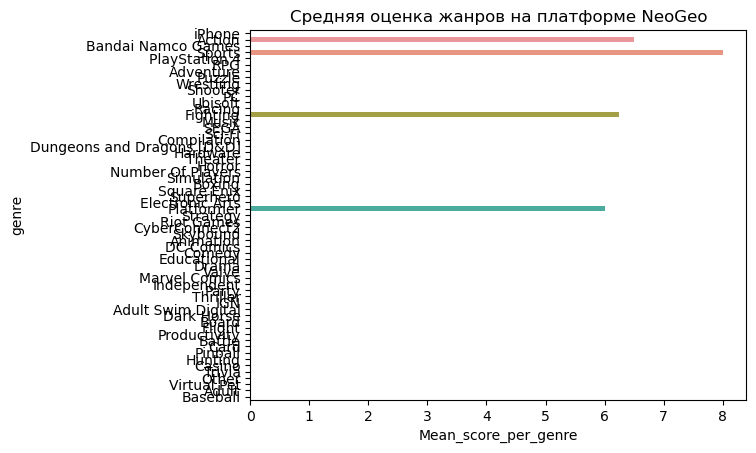

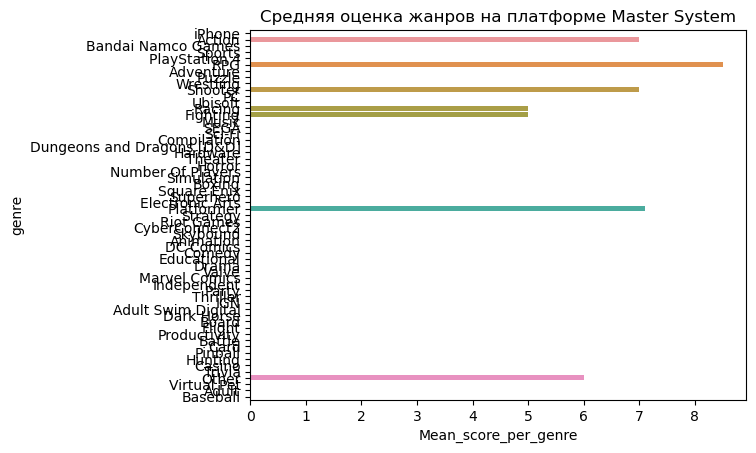

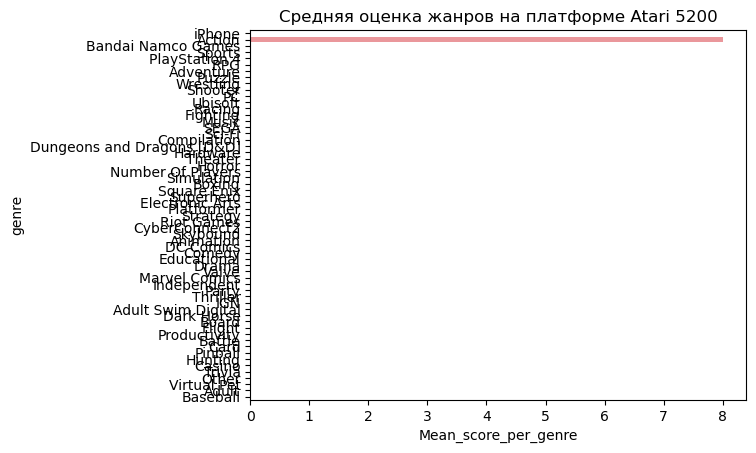

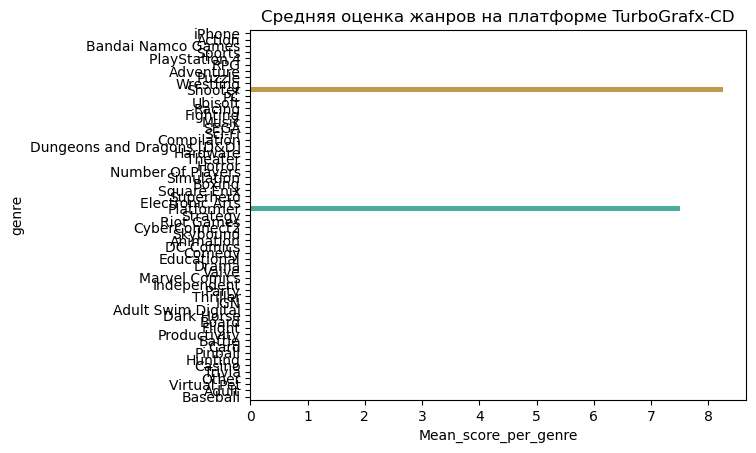

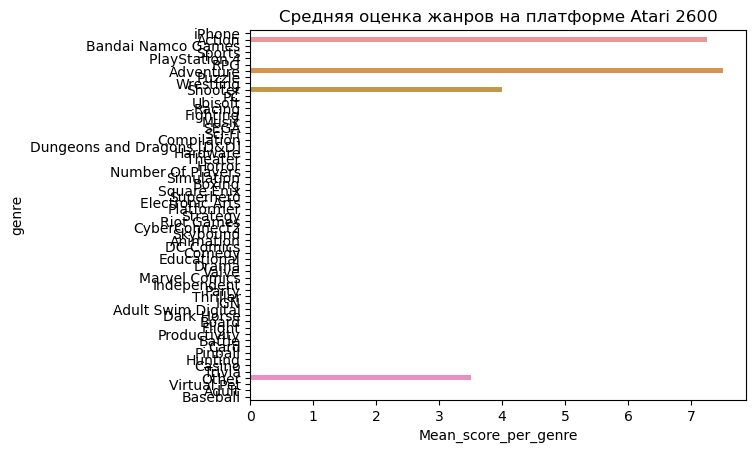

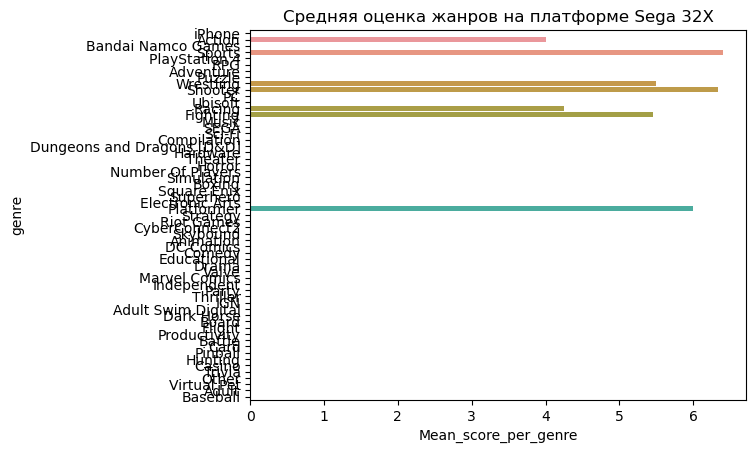

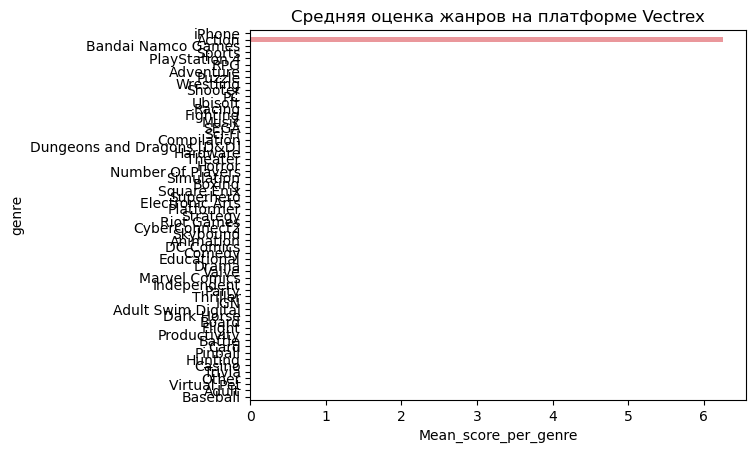

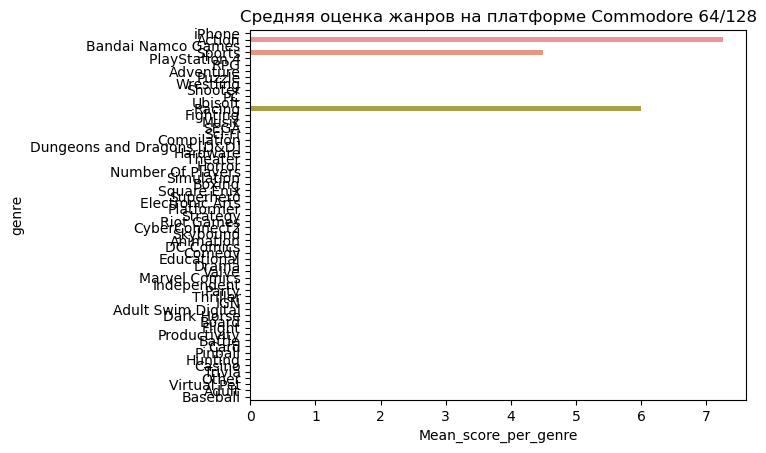

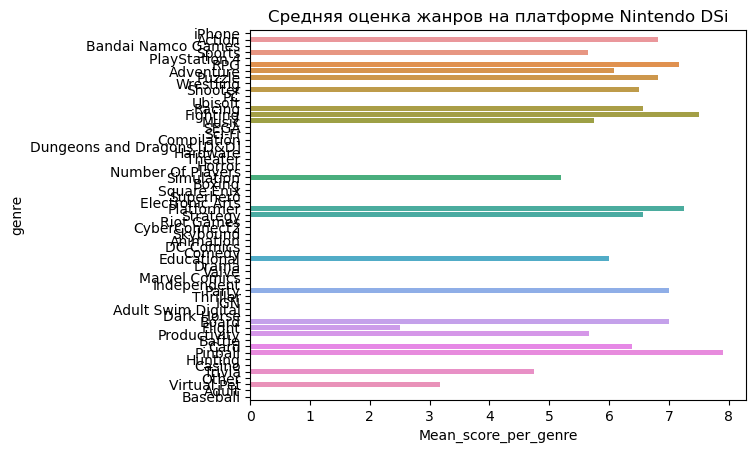

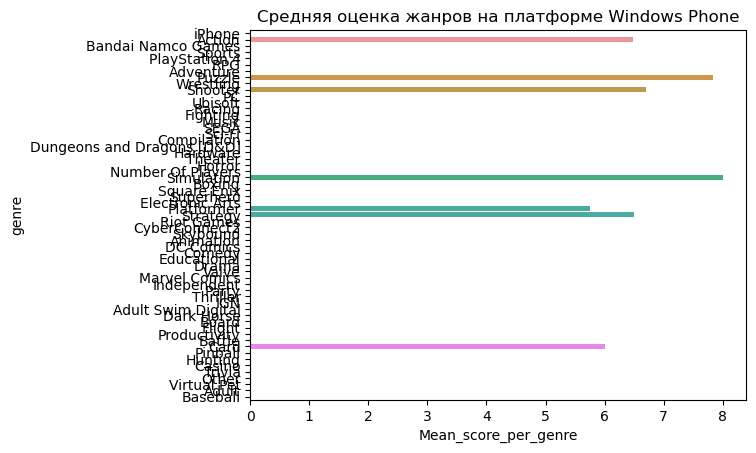

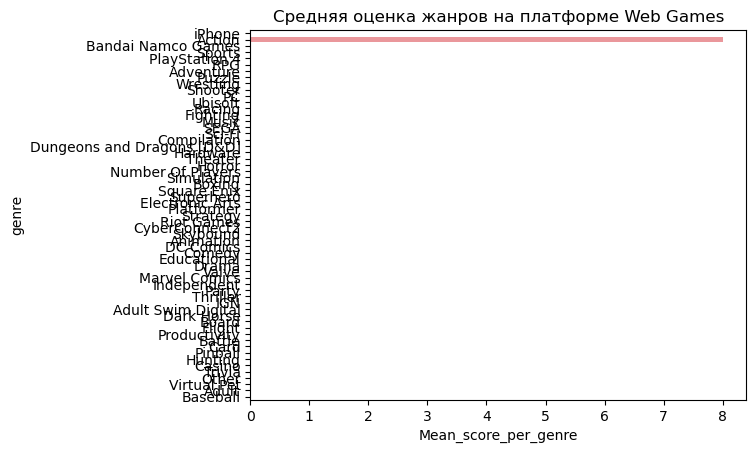

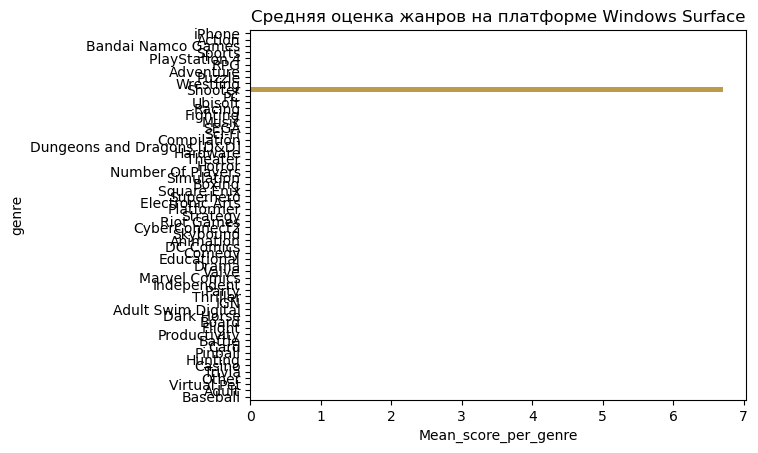

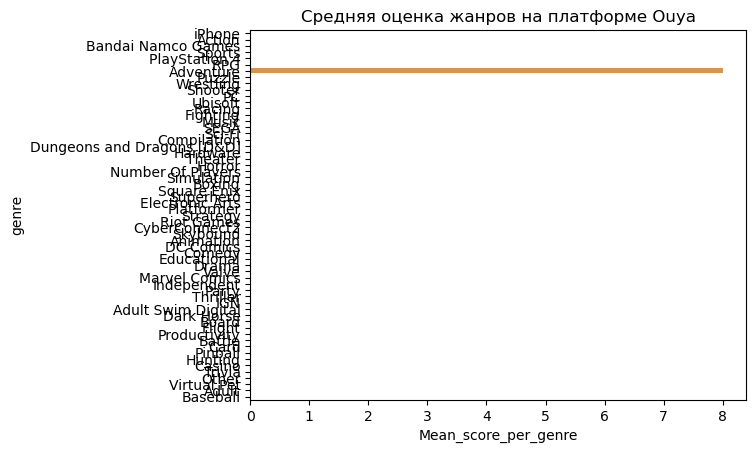

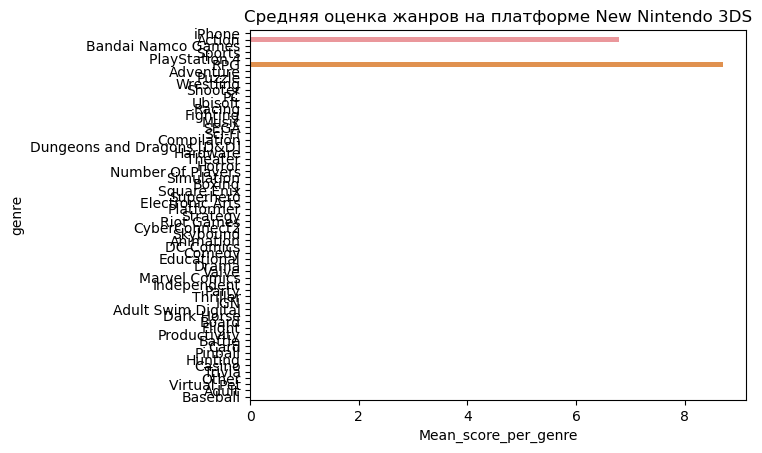

In [35]:
for i in df['platform'].unique():
    a = df[df['platform'] == i]['Mean_score_per_genre']
    sns.barplot(data=df, x=a, y='genre')
    plt.title(f'Средняя оценка жанров на платформе {i}')
    plt.show()